<a href="https://colab.research.google.com/github/sfansaria/Machine-Learning/blob/main/Univariate_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

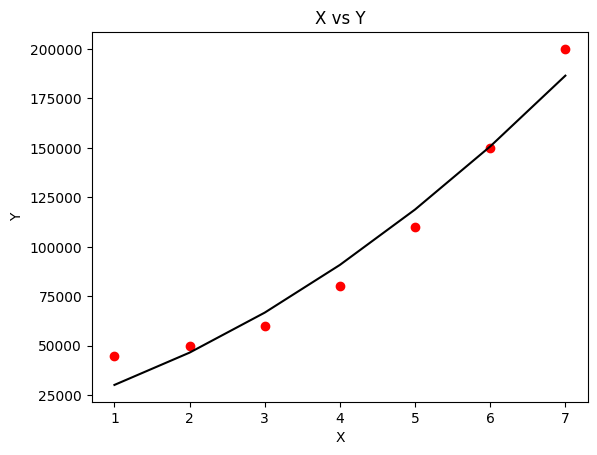

In [16]:

#import libraries

import numpy as np
import math
import matplotlib.pyplot as plt

#Univariate Polynomial Regression

class PolynomialRegression():
    def __init__(self,degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    #Function to transform X
    def transform(self, X):
        #initialize X_transform
        X_transform = np.ones((self.m, 1))

        j = 0
        for j in range(self.degree+1):
          if j != 0:
            x_pow = np.power(X, j)
            #append x_pow to X_transform
            X_transform = np.append(X_transform, x_pow.reshape(-1,1),axis=1)

        return X_transform

      #Function to normalize X_transform
    def normalize(self, X):
        X[:, 1:] = (X[:, 1:]-np.mean(X[:, 1:],axis=0))/np.std(X[:, 1:],axis=0)

        return X

    #Model training
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape

        #weight initialization
        self.W = np.zeros(self.degree+1)

        #transform X for polynomial h(x) = w0* x^0+w1*x^1+w2*x^2+......+wn*x^n
        X_transform = self.transform(self.X)

        #normalize X_transform
        X_normalize = self.normalize(X_transform)

        #gradient descent learning
        for i in range(self.iterations):
            h = self.predict(self.X)
            error = h - self.Y

            #update weights
            self.W = self.W - self.learning_rate*(1/self.m)*np.dot(X_normalize.T, error)
        return self
    #predict

    def predict(self, X):
       #transform X for polynomial h(x) = w0* x^0+w1*x^1+w2*x^2+......+wn*x^n
        X_transform = self.transform(X)

        X_normalize = self.normalize(X_transform)

        return np.dot(X_transform, self.W)

def main():
  #create a dataset
  X = np.array( [ [1], [2], [3], [4], [5], [6], [7] ] )

  Y = np.array( [ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ] )

  #X = np.array([ [1], [2], [3], [4], [5], [6], [7] ])
  #Y = np.array([ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ])

  #model training
  model = PolynomialRegression(degree=2, learning_rate=0.01,iterations=500)
  model.fit(X, Y)

  #Prediction on training set
  Y_pred = model.predict(X)

  #Visualization
  plt.scatter(X, Y, color='red')
  plt.plot(X, Y_pred, color='black')
  plt.title('X vs Y')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

if __name__=="__main__":
   main()



